# Чтение файлов в Python и командной строке. Практическая работа

### Цели практической работы
1. Научиться считывать информацию из файлов и совершать над ней операции с помощью кода на Python и командной строки.
2. Закрепить навыки стыковки команд в конвейеры и установки внешних пакетов с помощью пакетного менеджера pip.

### Что входит в практическую работу
1. Работа с файлами в командной строке.
2. Работа с файлами в Python 1.
3. Работа с файлами в Python 2.
4. Импортирование модулей.
5. Установка внешних модулей через pip.
6. Бонусное задание.

### Что оценивается
* Выполнены пять обязательных заданий, в каждом из них:
 * программа выполняет все описанные в задании действия;
 * результаты вычислений и применённых операций корректны;
 * стилизация кода соответствует рекомендациям [PEP 8](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html).


### Как отправить работу на проверку
Все задания собраны в один Jupyter Notebook. Выполните их, сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте итоговый файл Jupyter Notebook в формате IPYNB или ссылку на него через форму для сдачи практической работы.

---

## Задание 1. Работа с файлами в командной строке

Ранее вы считали количество всех слов в рассказе А. П. Чехова «Анна на шее». Теперь необходимо определить, сколько раз каждое слово встречается в тексте.

Вы уже знаете команды sort и uniq, умеете с их помощью считать количество уникальных строк в построчном файле. В результате у вас должен был получиться такой конвейер команд: `cat anna_words.txt | sort | uniq | wc -l`.

Команда cat перенаправляет слова из файла в команду sort, которая сортирует слова и передаёт упорядоченный список в команду uniq. Последняя удаляет дубликаты и направляет список уникальных слов в команду wc −l, которая их считает.

### Что нужно сделать

Посчитайте количество уникальных слов и определите частоту встречаемости каждого слова. Информацию в виде `частота слово` сохраните в текстовый файл. Для этого:
1. Измените конвейер команд так, чтобы он выводил слова и их частоту встречаемости на экран.
2. Перенаправьте вывод конвейера в текстовый файл `words_freq.txt`.

Если всё сделаете правильно, то получится текстовый файл `words_freq.txt`, в котором будут слова и их частота в виде:

```
...
   1 по-прежнему
   2 по-французски
  40 аня
   6 бал
   1 бог
   2 ваш
   2 вид
...
```

3. Скопируйте конвейер команд в ячейку, которая расположена непосредственно под этой.

### Подсказки
1. Ознакомьтесь с документацией команды uniq, обратите внимание на её ключ `-с`. Официальную документацию можно почитать прямо в командной строке: для этого выполните команду `man uniq`. Команда `man` (от англ. manual) выводит справку для команды, которая передаётся в man как аргумент. Если читать текст в терминале непривычно, то можете поискать информацию в интернете.

2. Перенаправить вывод команды в bash можно с помощью символа `>`. О том, как это сделать, читайте в интернете. Например, в статье [**«Перенаправление ввода вывода Linux»**](https://losst.ru/perenapravlenie-vvoda-vyvoda-linux).

### Вставьте конвейер команд, который у вас получился

In [3]:
!cat anna_words.txt | sort | uniq -c | sort -nr > words_freq.txt

In [4]:
!ls

anna_words.txt	sample_data  words_freq.txt


---

## Задание 2. Работа с файлами в Python 1

### Что нужно сделать
В рассказе А. П. Чехова «Анна на шее» найдите десять слов, которые встречаются чаще всего.

1. Напишите код на Python, который читает файл `word_freq.txt` по строкам, преобразует каждую из них в кортеж `(частота, слово)` и складывает полученные кортежи в список.
2. Отсортируйте список по частотам, выведите на экран десять самых популярных слов и их частоты.

### Подсказки
1. Обратите внимание, что строки в файле содержат «лишние» символы: пробелы в начале и символ перевода строки в конце. Работать будет удобнее, если предварительно удалить их. Сделать это можно с помощью метода  `strip`. Ознакомьтесь с ним подробнее в [**официальной документации**](https://docs.python.org/3/library/stdtypes.html?highlight=strip#str.strip).

2. Сейчас частота и слово — это одна строка, в которой они разделены пробелом. Их можно разделить с помощью метода [**`split`**](https://docs.python.org/3/library/stdtypes.html?highlight=split#str.split).

3. Для сортировки в Python есть функция `sorted`. Она принимает на вход итерируемый объект, сравнивает его элементы между собой и возвращает итерируемый объект, который отсортирован. По умолчанию функция размещает элементы в порядке возрастания. Например, `sorted([2, 4, 1, 0])` вернёт `[0, 1, 2, 4]`. Подробнее про работу функции можно почитать в [**официальной документации**](https://docs.python.org/3/library/functions.html?highlight=sorted#sorted)

In [6]:
# Чтение файла и создание списка кортежей
word_freq_list = []

with open('words_freq.txt', 'r', encoding='utf-8') as file:
    for line in file:
        # Удаление лишних пробелов и символов новой строки
        line = line.strip()
        # Разделение строки на частоту и слово
        parts = line.split()
        if len(parts) == 2:  # Убедимся, что строка содержит две части
            frequency = int(parts[0])  # Преобразуем частоту в целое число
            word = parts[1]  # Слово
            word_freq_list.append((frequency, word))  # Добавляем кортеж в список

# Сортировка списка по частоте в порядке убывания
sorted_word_freq = sorted(word_freq_list, key=lambda x: x[0], reverse=True)

# Вывод десяти самых популярных слов и их частоты
print("Десять самых популярных слов:")
for freq, word in sorted_word_freq[:10]:
    print(f"{word}: {freq}")

Десять самых популярных слов:
аня: 40
свой: 28
говорить: 19
это: 17
сказать: 17
модест: 17
который: 17
алексеич: 17
человек: 16
рука: 16


---

## Задание 3. Работа с файлами в Python 2

### Что нужно сделать
Найдите букву, с которой чаще всего начинаются слова в рассказе А. П. Чехова «Анна на шее».
1. Используйте файл с частотами слов `words_freq.txt`.
2. Напишите код в Python, который выводит на экран самую популярную первую букву и количество слов на неё.


### Подсказки
Скорее всего, вы будете искать в словаре ключ с максимальным значением. Чтобы упростить работу, отсортируйте словарь. Сортировать словарь по значениям сложнее, чем список объектов, которые можно сравнивать непосредственно. Обратите внимание на параметр key функции [**sorted**](https://docs.python.org/3/library/functions.html?highlight=sorted#sorted).

In [7]:
# Создание словаря для подсчета слов по первой букве
letter_count = {}

with open('words_freq.txt', 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        parts = line.split()
        if len(parts) == 2:
            word = parts[1]  # Получаем слово
            first_letter = word[0].lower()  # Первая буква в нижнем регистре

            # Увеличиваем счетчик для первой буквы
            if first_letter in letter_count:
                letter_count[first_letter] += 1
            else:
                letter_count[first_letter] = 1

# Находим букву с максимальным количеством слов
most_common_letter = max(letter_count, key=letter_count.get)
most_common_count = letter_count[most_common_letter]

# Вывод результата
print(f"Самая популярная первая буква: '{most_common_letter}' с количеством слов: {most_common_count}")

Самая популярная первая буква: 'п' с количеством слов: 196


---

## Задание 4. Импортирование модулей

###Что нужно сделать
Напишите функцию `circ_sqrt`. Она должна принимать один параметр `r` типа `float` и возвращать квадратный корень из длины окружности радиуса `r`.

### Подсказки
- Используйте функции встроенного модуля math.
- В работе функции учтите область определения квадратного корня.

In [8]:
import math

def circ_sqrt(r: float) -> float:
    # Проверка на положительность радиуса
    if r < 0:
        raise ValueError("Радиус должен быть неотрицательным.")

    # Длина окружности: C = 2 * π * r
    circumference = 2 * math.pi * r

    # Возвращаем квадратный корень из длины окружности
    return math.sqrt(circumference)

# Пример использования функции
try:
    radius = 5.0
    result = circ_sqrt(radius)
    print(f"Квадратный корень из длины окружности радиуса {radius}: {result}")
except ValueError as e:
    print(e)


Квадратный корень из длины окружности радиуса 5.0: 5.604991216397929


---

## Задание 5. Установка внешних модулей через pip

### Что нужно сделать

Установите пакеты из PyPi с помощью пакетного менеджера pip и используйте их в коде.
1. Установите пакет `cowsay`.
2. Установите в систему пакет `wikipedia` — Python API для очень популярной онлайн-энциклопедии.
3. Напишите функцию `random_article`, которая выводит на экран очень умную корову. Корова должна «рассказывать» краткое содержание случайной статьи из «Википедии» на английском языке.


### Подсказки

Вам понадобятся следующие функции пакета `wikipedia`:

* [**wikipedia.random**](https://wikipedia.readthedocs.io/en/latest/code.html#wikipedia.random)
* [**wikipedia.summary**](https://wikipedia.readthedocs.io/en/latest/code.html#wikipedia.summary)

In [9]:
!pip install cowsay
!pip install wikipedia


  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=3842da71afc699ac69c4246e8d70ca5142b88946cd038dfdf59c1e757beba036
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [10]:
import cowsay
import wikipedia

def random_article():
    # Получаем случайную статью из Википедии
    article_title = wikipedia.random()

    # Получаем краткое содержание статьи
    summary = wikipedia.summary(article_title, sentences=2)

    # Используем корову для вывода
    cowsay.cow(summary)

# Пример вызова функции
random_article()

  _________________________________________________
 /                                                 \
| Auguste Wilbrandt-Baudius (1 June 1843, Zwickau – |
|  30 March 1937, Vienna) was a German-Austrian act |
| ress, writer and journalist. She is considered on |
| e of the most popular actresses of her time in Vi |
| enna, especially for female and mother roles.     |
 \                                                 /
                                                 \
                                                  \
                                                    ^__^
                                                    (oo)\_______
                                                    (__)\       )\/\
                                                        ||----w |
                                                        ||     ||


---

## Задание 6. Бонусное

### Что нужно сделать

Выясните, как слова в рассказе «Анна на шее» распределяются по длине.

1. Посчитайте, сколько слов длины 1, 2 и так далее в файле anna_words.txt.

2. Выведите на экран информацию в формате `длина количество_слов`, отсортируйте её по возрастанию длины.

3. Перенесите вывод программы в Excel или Google Таблицы и постройте столбчатую диаграмму.

4. Сравните ваш график с [распределением русских слов по длине](http://nskhuman.ru/unislov/statist.php?nstat=21). В гистограмме по ссылке больше данных, поэтому она лучше показывает соотношение длины слов и их количества в русском языке.

### Советы и рекомендации
Вероятнее всего, вы снова будете использовать словарь. Ключами в нём будет длина слов, а значениями — количество слов этой длины. Обратите внимание, что словарь нужно сортировать по ключам, а не по значениям, как вы делали ранее.

In [11]:
# Создание словаря для подсчета количества слов по длине
length_count = {}

with open('anna_words.txt', 'r', encoding='utf-8') as file:
    for line in file:
        # Удаляем лишние пробелы и символы новой строки
        words = line.strip().split()
        for word in words:
            word_length = len(word)  # Получаем длину слова

            # Увеличиваем счетчик для соответствующей длины слова
            if word_length in length_count:
                length_count[word_length] += 1
            else:
                length_count[word_length] = 1

# Сортируем словарь по ключам (длинам слов)
sorted_length_count = dict(sorted(length_count.items()))

# Вывод результата
for length, count in sorted_length_count.items():
    print(f"{length} {count}")


1 6
2 13
3 127
4 299
5 288
6 334
7 399
8 314
9 182
10 124
11 111
12 45
13 21
14 11
15 7
16 1
17 4
18 2


In [20]:
import pandas as pd
# Преобразуем данные в DataFrame
df = pd.DataFrame(sorted_length_count.items(), columns=['Длина слова', 'Количество слов'])


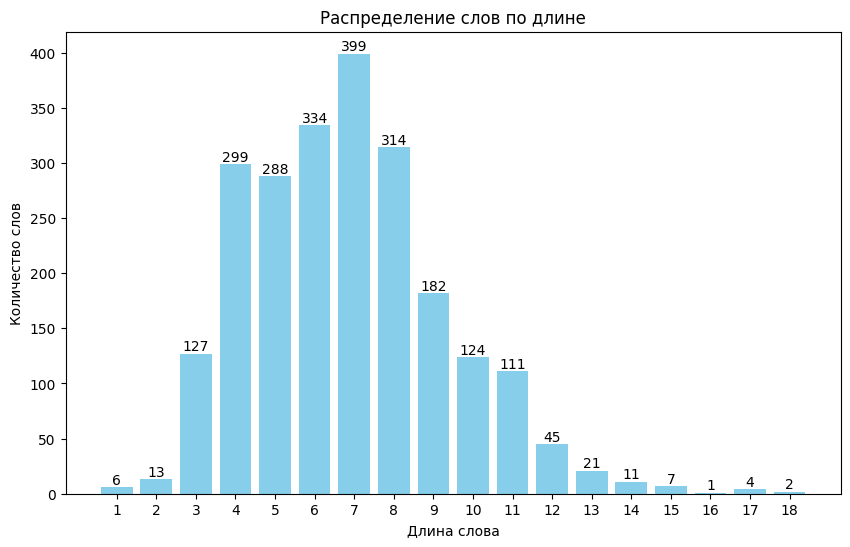

In [22]:
import matplotlib.pyplot as plt

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Длина слова'], df['Количество слов'], color='skyblue')
plt.title('Распределение слов по длине')
plt.xlabel('Длина слова')
plt.ylabel('Количество слов')
plt.xticks(df['Длина слова'])  # Установка меток по оси X

# Добавление меток данных над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()  # Отображение диаграммы